If you work from collab, write "1" below, from pc - "0"

In [ ]:
while True:
    print("Please Select if you want work from: \n 0 - home pc \n 1 - colab :") 
    selection = input()
    if selection == '0': 
        colab = 0
        print("You want work from pc")
        break
    elif selection =='1': 
        colab = 1
        print("You will work from colab\n")
        break
    else: 
        print("Unknown Option Selected! Only 0 or 1 accepted")

Please Select if you want work from: 
 0 - home pc 
 1 - colab :
1
You will work from colab



# Wikipedia: blocking of users and policies


##Useful libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import json

## Plot functions

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

In [ ]:
def show_plot_1(x, y, my_title = "", my_xlabel = "", my_ylabel = ""):
    plt.figure(figsize=(21, 8))
    plt.plot(x, y)
    
    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

In [ ]:
def show_plot_2(x1,y1, x2,y2, my_title = "", my_xlabel = "", my_ylabel = "", legend_1="", legend_2=""):
    fig, ax = plt.subplots(figsize=(21, 8))
    
    ax.plot(x1, y1, color='blue')
    ax.plot(x2, y2, color='red')
    plt.legend([legend_1, legend_2], loc=0)

    plt.title(my_title)
    plt.xlabel(my_xlabel)
    plt.ylabel(my_ylabel)

    plt.show()

## Read files from colab/pc - select!

In [ ]:
# if you run in colab - use this to connect to folders
print(colab)
if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive/')
    # no space in the root name folder
    %cd drive/MyDrive/Wikipedia-Block-log/
    # path to the original data folder and results folder
    folder = 'data_original/' 
    folder_result = 'data_results/' 
elif collab == 0:
    # path to the original data folder and results folder
    folder = '../data_original/' 
    folder_result = '../data_results/' 

1
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Wikipedia-Block-log/'
/content/drive/.shortcut-targets-by-id/1cwF4y14tRCROlaSBdmz79MlfJPl_pRVu/Wikipedia-Block-log


In [ ]:
file = 'freq_policies_monthly.csv'
freq_policies_monthly = pd.read_csv(folder + file)
freq_policies_monthly['month'] = pd.to_datetime(freq_policies_monthly['month'])

In [ ]:
file = 'MonthlyEditAndEditorsFrom2004-2017.csv'
wiki_data_full = pd.read_csv(folder + file)

In [ ]:
file = 'block_log_data_cleaned.csv'
df = pd.read_csv(folder + file)
df['timestamp'] = pd.to_datetime(df['timestamp'])

### First glance at the data
When we first conducted our analysis (Dec 2022) our original dataframe had:
- 8 columns: title, action, user, timestamp, comment, duration, flags, expiry
- 4202626 entries (years 2004 to 2017)
- first timestamp: 2004-12-23 00:00:00, last timestamp: 2017-12-31 00:00:00

We later removed the year 2004 which held to few data to be relevant.

In [ ]:
df.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
1,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN


**title** = the user being blocked

**action** = block or unblock - we will only focus on block

**user** = the person (administrator) implementing the block

**timestamp** = the block event date

**comment** = blocking rationale

**duration** = blocking scheduled duration

**flag** = mysterious information

**expiry** = sometimes, a timestamp

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202626 entries, 0 to 4202625
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 256.5+ MB


In [ ]:
df.describe()

<ipython-input-118-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,title,action,user,timestamp,comment,duration,flags,expiry
count,4202381,4202626,4202626,4202626,4202626,4136379,4136379,3298853
unique,3692933,3,1959,4323,369989,19050,34,2073255
top,ThisIsaTest,block,ProcseeBot,2013-10-29 00:00:00,{{blocked proxy}} <!-- 8080 -->,60 days,['nocreate'],2007-09-01T00:00:00Z
freq,597,4067771,2370014,12702,730464,1645505,3021835,520
first,NaN,NaN,NaN,2004-12-23 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN


## H1: We expect the total number of blocks (normalized) to diminish over time.

In [ ]:
# keeping only block events 
df_ac_block = df[df['action'] == 'block']

In [ ]:
df_ac_block.tail()

,title,action,user,timestamp,comment,duration,flags,expiry
4202621,Yaboi51525,block,Widr,2017-12-31,[[WP:Vandalism|Vandalism]],infinity,['nocreate'],NaN
4202622,73.33.16.177,block,Widr,2017-12-31,[[WP:Vandalism|Vandalism]],31 hours,"['anononly', 'nocreate']",2018-01-02T06:35:18Z
4202623,2601:543:C880:2E6:2942:AB8B:2D6E:9740,block,Widr,2017-12-31,[[WP:Vandalism|Vandalism]],31 hours,['nocreate'],2018-01-02T06:36:02Z
4202624,Genome$100,block,Bbb23,2017-12-31,{{checkuserblock-account}}: Abusing [[WP:SOCK|...,infinity,['nocreate'],NaN
4202625,CookieMonster756,block,CambridgeBayWeather,2017-12-31,{{uw-ublock-double}} <!-- Username closely res...,infinity,['nocreate'],NaN


In [ ]:
df_ac_block.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN


In [ ]:
# get unique titles
df_ac_block_monthly = df_ac_block.groupby(pd.PeriodIndex(df_ac_block['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
df_ac_block_monthly = df_ac_block_monthly.to_frame()
df_ac_block_monthly = df_ac_block_monthly.reset_index()

In [ ]:
df_ac_block_monthly.tail()

,timestamp,title
152,2017-08,57155
153,2017-09,53433
154,2017-10,62062
155,2017-11,55841
156,2017-12,48495


In [ ]:
df_ac_block_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   timestamp  157 non-null    period[M]
 1   title      157 non-null    int64    
dtypes: int64(1), period[M](1)
memory usage: 2.6 KB


In [ ]:
df_ac_block_monthly['timestamp'] = df_ac_block_monthly['timestamp'].dt.to_timestamp()
df_ac_block_monthly = df_ac_block_monthly.rename(columns={"title": "blocked_people"})

In [ ]:
df_ac_block_monthly.head()

,timestamp,blocked_people
0,2004-12-01,318
1,2005-01-01,947
2,2005-02-01,1207
3,2005-03-01,715
4,2005-04-01,625


In [ ]:
wiki_data_full.head()

,month,edits,editors
0,2004-01-01T00:00:00.000Z,218853,14858
1,2004-02-01T00:00:00.000Z,310206,19883
2,2004-03-01T00:00:00.000Z,440685,26881
3,2004-04-01T00:00:00.000Z,405181,26519
4,2004-05-01T00:00:00.000Z,420408,28361


In [ ]:
wiki_data_full.dtypes

month      object
edits       int64
editors     int64
dtype: object

In [ ]:
wiki_data_full['month'] = pd.to_datetime(wiki_data_full['month'])
wiki_data = wiki_data_full[wiki_data_full['month'] >= '2005-01-01']
wiki_data['month'] = wiki_data['month'].dt.date
wiki_data.reset_index(drop=True, inplace=True)

<ipython-input-129-19a588f11bce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wiki_data['month'] = wiki_data['month'].dt.date


In [ ]:
df_ac_block_monthly = df_ac_block_monthly[df_ac_block_monthly['timestamp'] >= '2005-01-01']

block_vs_edits = df_ac_block_monthly.copy()
block_vs_edits.reset_index(drop=True, inplace=True)

Check the equality of lenght of time frame from 2005 to 2017 for 12 month. from wiki data (edits and editors and data about blocking)



In [ ]:
if len(wiki_data) != len(df_ac_block_monthly):
    print("data time frame ERROR")
else:
    print(len(wiki_data))

156


In [ ]:
df1 = wiki_data
df4 = block_vs_edits
result = pd.concat([df1, df4], axis=1, join="inner")
result = result.drop(columns = 'timestamp')

In [ ]:
result['%_bl_users'] = result['blocked_people']*100/result['editors']
result['%_bl_users'] = result['%_bl_users'].round(0)

In [ ]:
result.head()

,month,edits,editors,blocked_people,%_bl_users
0,2005-01-01,800186,80201,947,1.0
1,2005-02-01,789780,75824,1207,2.0
2,2005-03-01,1024707,92355,715,1.0
3,2005-04-01,1294737,113549,625,1.0
4,2005-05-01,1365329,125997,590,0.0


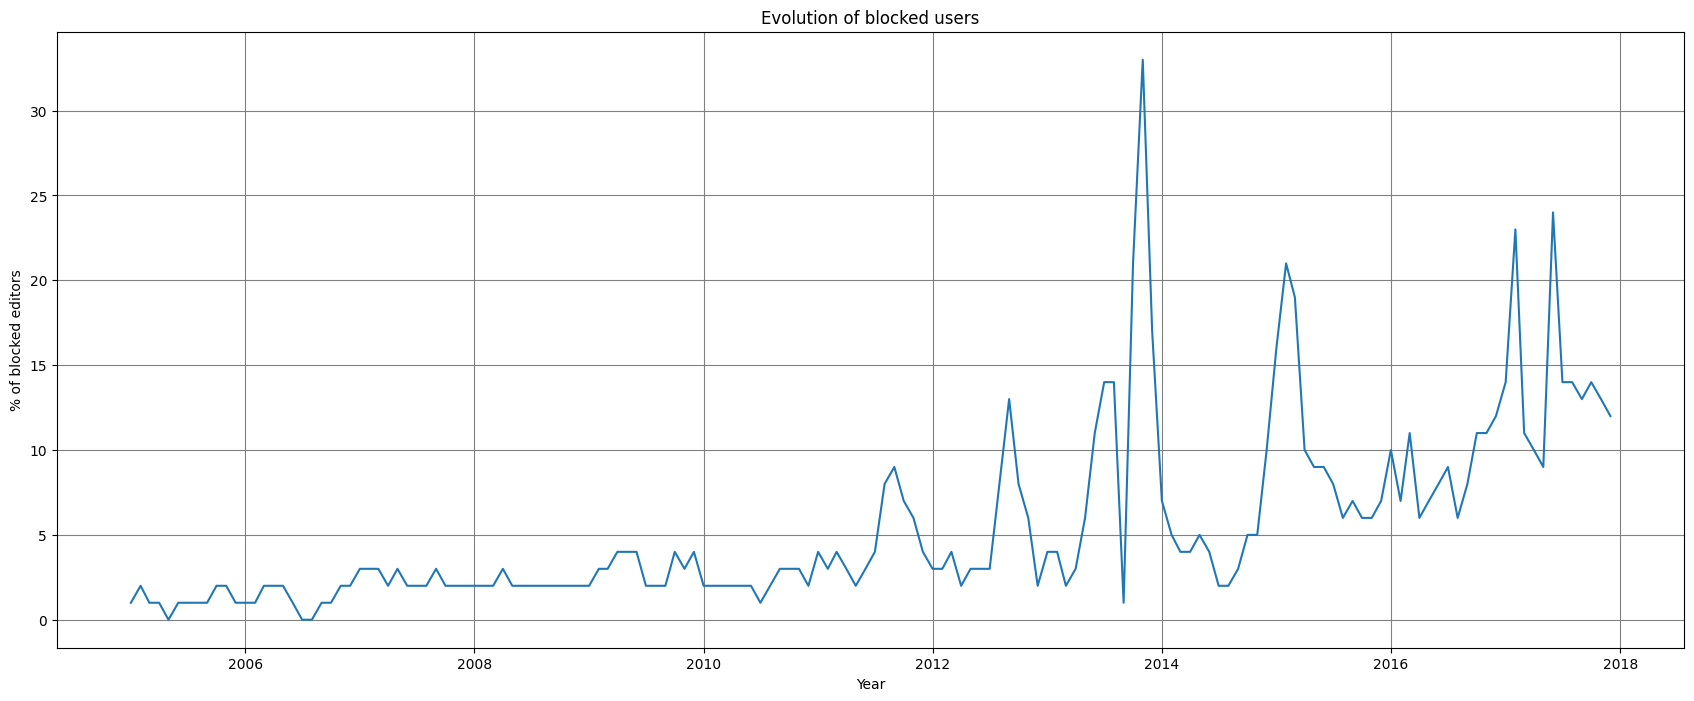

In [ ]:
x1 = result['month']
y1 = result['%_bl_users']
title = "Evolution of blocked users"
xlabel = "Year"
ylabel = "% of blocked editors"
show_plot_1(x1, y1, title, xlabel, ylabel)

In [ ]:
freq_policies_monthly.head()

,month,nb_policies
0,2005-01-01,28
1,2005-02-01,28
2,2005-03-01,28
3,2005-04-01,29
4,2005-05-01,29


In [ ]:
result_rn = freq_policies_monthly.rename(columns={"month": "date"})
df1 = result
df4 = result_rn
result_h1 = pd.concat([df1, df4], axis=1, join="inner")
result_h1 = result_h1.drop(columns = 'date')

In [ ]:
result_h1.head()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
0,2005-01-01,800186,80201,947,1.0,28
1,2005-02-01,789780,75824,1207,2.0,28
2,2005-03-01,1024707,92355,715,1.0,28
3,2005-04-01,1294737,113549,625,1.0,29
4,2005-05-01,1365329,125997,590,0.0,29


In [ ]:
result_h1.tail()

,month,edits,editors,blocked_people,%_bl_users,nb_policies
151,2017-08-01,4686591,399409,57155,14.0,58
152,2017-09-01,4666223,398494,53433,13.0,58
153,2017-10-01,4696462,436203,62062,14.0,58
154,2017-11-01,4622820,434451,55841,13.0,59
155,2017-12-01,4797589,409054,48495,12.0,59


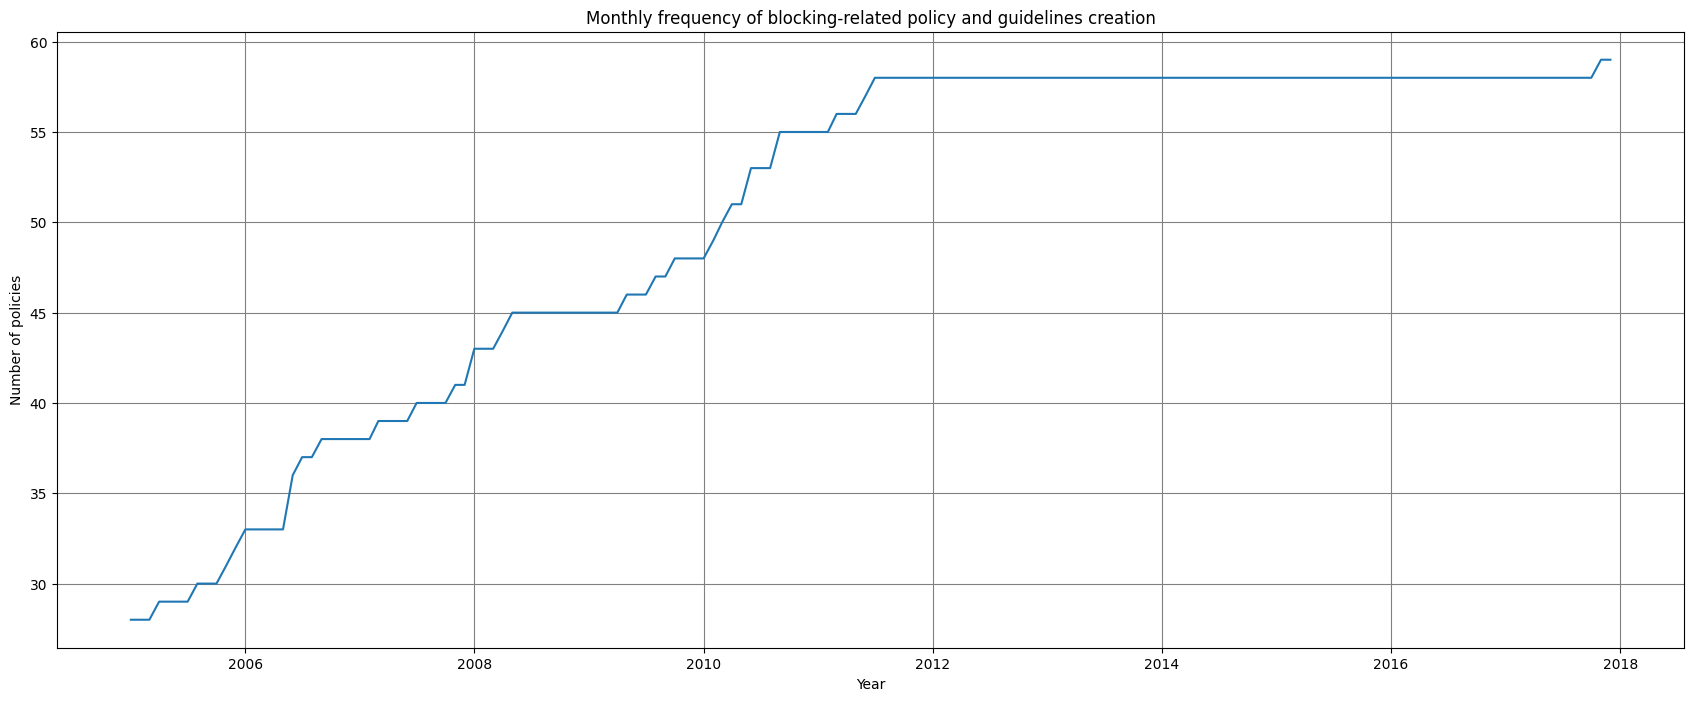

In [ ]:
x2 = result_h1['month']
y2 = result_h1['nb_policies']
title = "Monthly frequency of blocking-related policy and guidelines creation"
xlabel = "Year"
ylabel = "Number of policies"
show_plot_1(x2, y2, title, xlabel, ylabel)

Monthly % of blocked editors (users) from total number of editors per that time - **date**

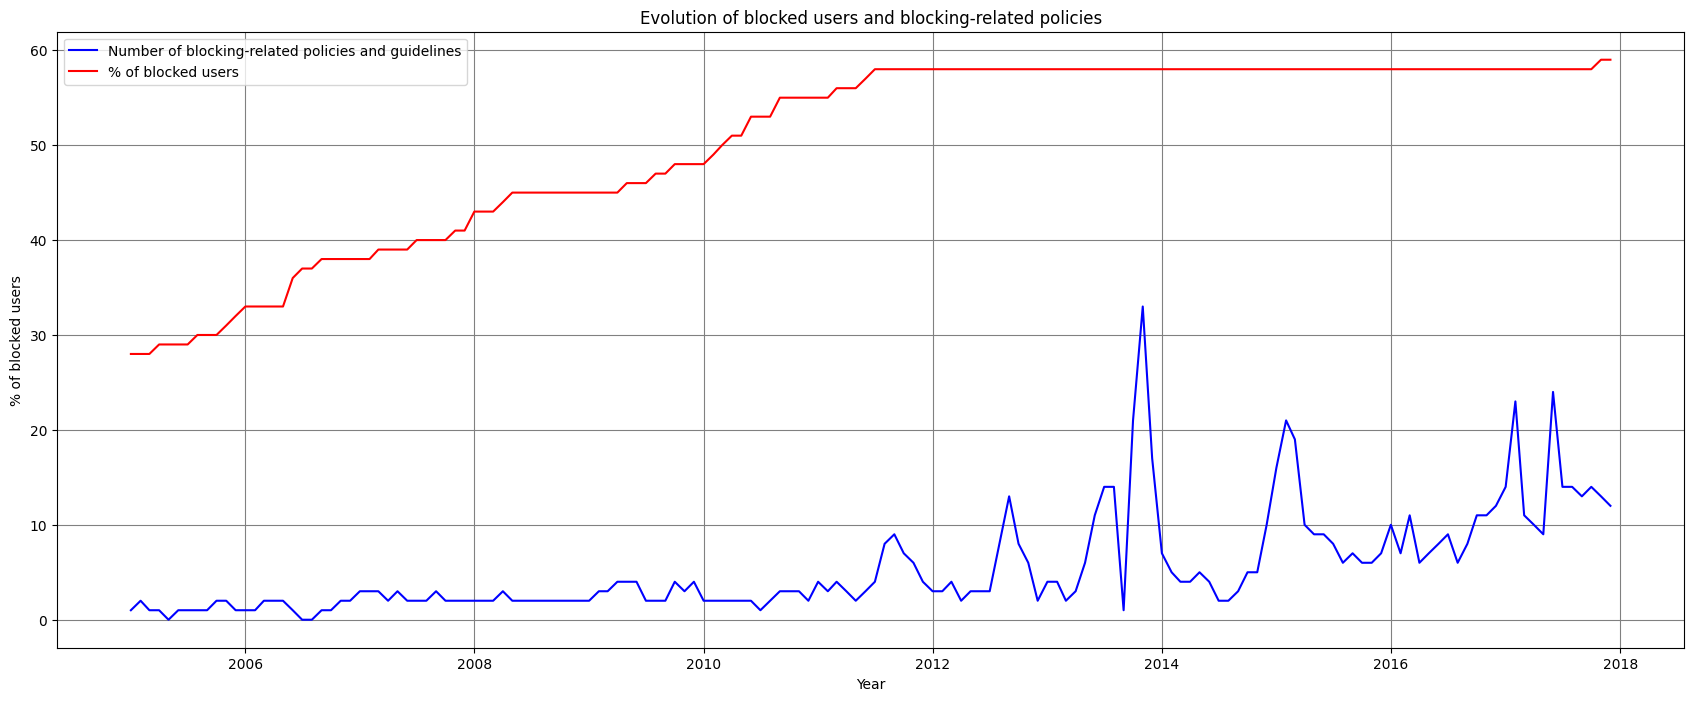

In [ ]:
title = "Evolution of blocked users and blocking-related policies"
xlabel = "Year"
ylabel = "% of blocked users"
legend_1 = "Number of blocking-related policies and guidelines" #Blue
legend_2 = "% of blocked users" #Red
show_plot_2(x1, y1, x2, y2, title, xlabel, ylabel, legend_1, legend_2)

In [ ]:
# saving
file_name = 'evolution_of_blocking.csv'
result_h1.to_csv(folder_result + file_name)

## H2: We expect the rationale for blocking to stabilize over time.

Working with tags

In [ ]:
# tags since 2007
tags = 'Vandalism**Vandalism-only**Copyright**Attack**Biographies**Citing**Patent**Spam**promotion**NOTADVERTISING**advertising**Spam**Promotion**Edit warring**Three-revert**Disruptive editing**Harassment**No legal threats**legal threats**Arbitration**Evasion**Sockpuppetry**multiple accounts**Edit filter**Long-term abuse**NOTHERE**{{anonblock}}**{{school block}}**{{rangeblock}}**{{blocked proxy}}**{{uw-ublock}}**{{uw-uhblock}}**{{uw-causeblock}}**{{uw-ublock-wellknown}}**{{uw-ublock-double}}**{{uw-uhblock-double}}**{{uw-softerblock}}**{{uw-spamublock}}**{{Uw-spamblacklistblock}}**{{uw-vaublock}}**{{CheckUser block}}**{{checkuserblock-wide}}**{{checkuserblock-account}}**{{Tor}}**{{webhostblock}}**{{colocationwebhost}}**{{OversightBlock}}'
tags = tags.lower()
tags = tags.split('**')
tags[:5]

['vandalism', 'vandalism-only', 'copyright', 'attack', 'biographies']

In [ ]:
def tagMatch(x):
  if any((match := substring) in x.lower() for substring in tags):
    return match
  else:
    return None

df['tag'] = df['comment'].apply(lambda x: tagMatch(x))
nb_tag_uniq = df['tag'].value_counts()

In [ ]:
print(len(nb_tag_uniq))
nb_tag_uniq

41


{{blocked proxy}}             2412911
vandalism                      586572
spam                           185006
multiple accounts              101980
{{anonblock}}                   76383
evasion                         46111
{{school block}}                44016
disruptive editing              42913
{{tor}}                         30040
{{checkuserblock-account}}      29205
attack                          26989
{{uw-softerblock}}              21063
promotion                       19216
edit warring                    15566
{{uw-ublock}}                   15228
edit filter                     11743
{{uw-uhblock}}                  11379
nothere                         10515
biographies                      8704
long-term abuse                  7163
copyright                        5174
three-revert                     3347
{{uw-vaublock}}                  3210
{{checkuser block}}              3172
citing                           3103
{{webhostblock}}                 2847
harassment  

In [ ]:
df_block_uniq_tag = df[df['action']=='block']
df_comments = df_block_uniq_tag.groupby([df_block_uniq_tag['timestamp'].dt.year, df_block_uniq_tag['tag']]).count()

In [ ]:
df_com_copy = df_comments.copy()

In [ ]:
df_comments.head()

title  action  user  timestamp  comment  duration  \
timestamp tag                                                                
2004      attack            21      21    21         21       21        21   
          copyright          2       2     2          2        2         2   
          legal threats      1       1     1          1        1         1   
          spam              16      16    16         16       16        16   
          vandalism        182     183   183        183      183       183   

                         flags  expiry  
timestamp tag                           
2004      attack            21       0  
          copyright          2       0  
          legal threats      1       0  
          spam              16       0  
          vandalism        183       0

In [ ]:
df_comments.tail()

title  action  user  timestamp  comment  \
timestamp tag                                                              
2017      {{uw-ublock}}           2342    2342  2342       2342     2342   
          {{uw-uhblock-double}}     19      19    19         19       19   
          {{uw-uhblock}}          2517    2517  2517       2517     2517   
          {{uw-vaublock}}          192     192   192        192      192   
          {{webhostblock}}         542     542   542        542      542   

                                 duration  flags  expiry  
timestamp tag                                             
2017      {{uw-ublock}}              2342   2342       0  
          {{uw-uhblock-double}}        19     19       0  
          {{uw-uhblock}}             2517   2517       0  
          {{uw-vaublock}}             192    192       0  
          {{webhostblock}}            542    542     538

In [ ]:
# start from 2005
n = 5 # to delete 2004
df_comments.drop(index=df_comments.index[:n], axis=0, inplace=True)

In [ ]:
df_comments.head()

title  action  user  timestamp  comment  duration  \
timestamp tag                                                              
2005      advertising      9       9     9          9        9         9   
          arbitration     74      74    74         74       74        74   
          attack         336     343   343        343      343       343   
          citing           1       1     1          1        1         1   
          copyright       30      30    30         30       30        30   

                       flags  expiry  
timestamp tag                         
2005      advertising      9       8  
          arbitration     74      53  
          attack         343     262  
          citing           1       1  
          copyright       30      26

In [ ]:
df_comments_yearly = df_comments['action']
df_comments_yearly = df_comments_yearly.rename_axis(['year','tag']).reset_index()

In [ ]:
df_comments_yearly.head()

,year,tag,action
0,2005,advertising,9
1,2005,arbitration,74
2,2005,attack,343
3,2005,citing,1
4,2005,copyright,30


In [ ]:
df_comments_yearly.tail()

,year,tag,action
420,2017,{{uw-ublock}},2342
421,2017,{{uw-uhblock-double}},19
422,2017,{{uw-uhblock}},2517
423,2017,{{uw-vaublock}},192
424,2017,{{webhostblock}},542


In [ ]:
# saving
file_name_q = 'data_qualitative.csv'
df_comments_yearly.to_csv(folder_result + file_name_q)

In [ ]:
data = {}

for index, row in df_comments_yearly.iterrows():
    year = row['year']
    tag = row['tag']
    nb_actions_per_tag__this_year = row['action']
    
    if tag not in data:
        data[tag] = year
        print(tag, data[tag])

advertising 2005
arbitration 2005
attack 2005
citing 2005
copyright 2005
disruptive editing 2005
edit warring 2005
evasion 2005
harassment 2005
legal threats 2005
multiple accounts 2005
no legal threats 2005
patent 2005
promotion 2005
sockpuppetry 2005
spam 2005
three-revert 2005
vandalism 2005
{{blocked proxy}} 2005
biographies 2006
long-term abuse 2006
{{anonblock}} 2006
{{school block}} 2006
{{tor}} 2006
{{checkuser block}} 2007
{{checkuserblock-account}} 2007
{{rangeblock}} 2007
{{uw-ublock}} 2007
{{uw-uhblock}} 2007
nothere 2008
{{uw-vaublock}} 2008
edit filter 2009
{{uw-softerblock}} 2009
{{uw-uhblock-double}} 2010
{{uw-causeblock}} 2011
{{uw-ublock-double}} 2011
{{webhostblock}} 2012
{{colocationwebhost}} 2013
{{oversightblock}} 2013
notadvertising 2014
{{checkuserblock-wide}} 2014


In [ ]:
print(len(data))

41


In [ ]:
rows = []
for tag, year in data.items():
    rows.append({'year': year, 'tag': tag})

tags_invention = pd.DataFrame(rows)

Year of tag creation

In [ ]:
tags_invention.tail(10)

,year,tag
31,2009,edit filter
32,2009,{{uw-softerblock}}
33,2010,{{uw-uhblock-double}}
34,2011,{{uw-causeblock}}
35,2011,{{uw-ublock-double}}
36,2012,{{webhostblock}}
37,2013,{{colocationwebhost}}
38,2013,{{oversightblock}}
39,2014,notadvertising
40,2014,{{checkuserblock-wide}}


In [ ]:
tags_count_new_year = tags_invention.groupby(['year'])['tag'].count()

In [ ]:
rows = []
total_sum = 0
for year, count in tags_count_new_year.items():
    total_sum += count
    rows.append({'year': year, 'count_dropdown_tags': count, 'frequencies_dropdown_tags':total_sum})

df_tags_count_new_year = pd.DataFrame(rows)

Tags frequencies

In [ ]:
df_tags_count_new_year

,year,count_dropdown_tags,frequencies_dropdown_tags
0,2005,19,19
1,2006,5,24
2,2007,5,29
3,2008,2,31
4,2009,2,33
5,2010,1,34
6,2011,2,36
7,2012,1,37
8,2013,2,39
9,2014,2,41


In [ ]:
# saving
file_name = 'year_count_freq.csv'
df_tags_count_new_year.to_csv(folder_result + file_name)

In [ ]:
df_block_uniq_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067771 entries, 0 to 4202625
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   title      object        
 1   action     object        
 2   user       object        
 3   timestamp  datetime64[ns]
 4   comment    object        
 5   duration   object        
 6   flags      object        
 7   expiry     object        
 8   tag        object        
dtypes: datetime64[ns](1), object(8)
memory usage: 310.3+ MB


### Blocklog tags

In [ ]:
df_block_uniq_tag.head()

,title,action,user,timestamp,comment,duration,flags,expiry,tag
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN,None
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN,None
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN,None
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN,vandalism
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN,None


In [ ]:
df_ac_block_tag_n_y = df_block_uniq_tag[pd.isnull(df_block_uniq_tag['tag'])].groupby(df_block_uniq_tag['timestamp'].dt.year).size().reset_index(name='count')
df_ac_block_tag_n_y.drop(index = df_ac_block_tag_n_y.index[0], axis=0, inplace=True)
df_ac_block_tag_n_y = df_ac_block_tag_n_y.reset_index()
df_ac_block_tag_n_y = df_ac_block_tag_n_y.drop(columns = 'index')
df_ac_block_tag_n_y = df_ac_block_tag_n_y.rename(columns={"count": "count_none_tag", "timestamp": "year"})

In [ ]:
df_ac_block_tag_n_y

,year,count_none_tag
0,2005,15331
1,2006,38278
2,2007,91586
3,2008,65528
4,2009,36820
5,2010,16718
6,2011,24330
7,2012,21695
8,2013,21424
9,2014,20473


In [ ]:
df1 = df_ac_block_tag_n_y
df4 = df_tags_count_new_year
df_none_tag_yearly = pd.merge(df1, df4, how="outer",  left_on='year', right_on='year')
df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']] = df_none_tag_yearly[['count_dropdown_tags','frequencies_dropdown_tags']].fillna(0)

### None tag yearly

In [ ]:
df_none_tag_yearly

,year,count_none_tag,count_dropdown_tags,frequencies_dropdown_tags
0,2005,15331,19.0,19.0
1,2006,38278,5.0,24.0
2,2007,91586,5.0,29.0
3,2008,65528,2.0,31.0
4,2009,36820,2.0,33.0
5,2010,16718,1.0,34.0
6,2011,24330,2.0,36.0
7,2012,21695,1.0,37.0
8,2013,21424,2.0,39.0
9,2014,20473,2.0,41.0


### Bar plot

In [ ]:
x = df_none_tag_yearly['year']
y = df_none_tag_yearly['count_none_tag']
y2 = df_none_tag_yearly['frequencies_dropdown_tags']

title = "Yearly occurences of None tag in blocking rationale (from dropdown menu)"
xlabel = "Year"
ylabel = "Number of None tags"

In [ ]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

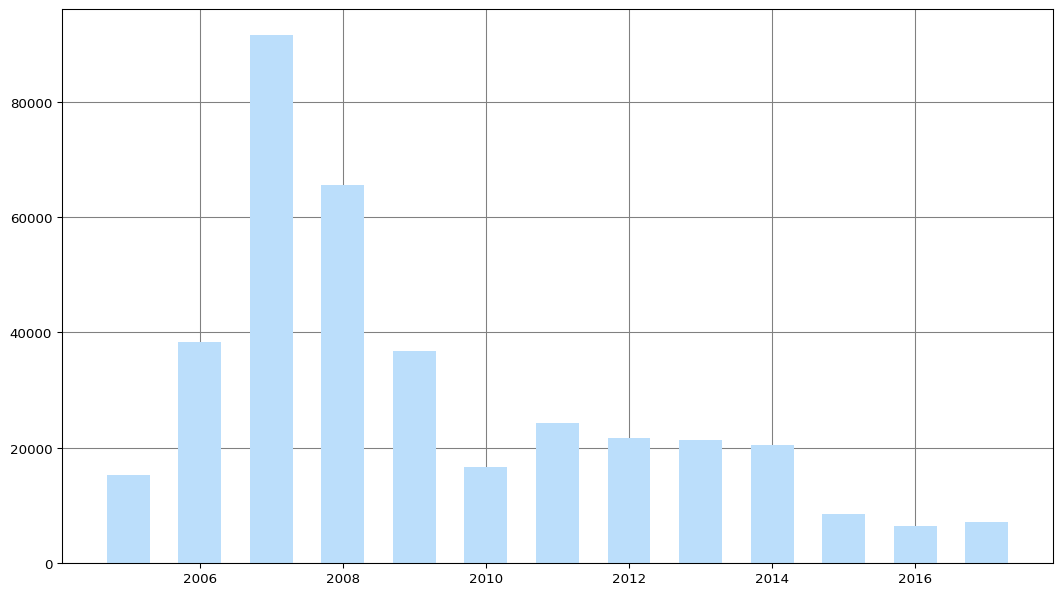

In [ ]:
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
# norm = mpl.colors.Normalize(y.min(), y.max()) # linearly normalizes data into the [0.0, 1.0] interval
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Plot bars
# bar1 = ax.bar(x, y, color=cmap(norm(y)), width=0.6, zorder=2)
bar1 = ax.bar(x, y, color=cmap(y), width=0.6, zorder=2)

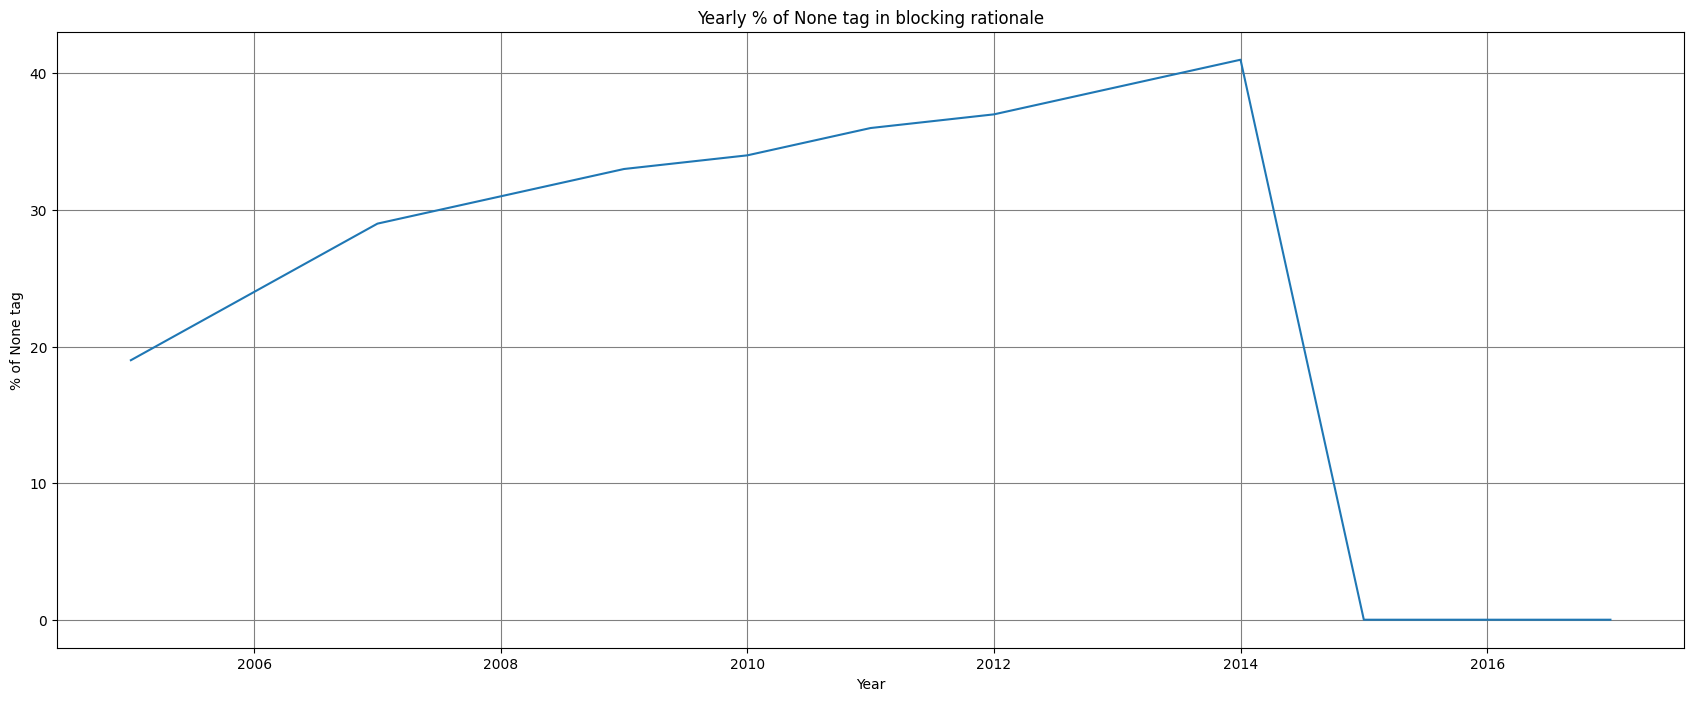

In [ ]:
title = "Yearly % of None tag in blocking rationale"
xlabel = "Year"
ylabel = "% of None tag"
show_plot_1(x, y2, title, xlabel, ylabel)

In [ ]:
# saving
file_name = 'NoneTagYearly.csv'
df_none_tag_yearly.to_csv(folder_result + file_name)